# Ciclos termodinamicos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as stl
import matplotlib.ticker as ticker
import matplotlib.colors
stl.use('seaborn')
import pandas as pd

from DampedKHO import *

In [2]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","yellow","red", "RED"])

## Ciclo termodinamico 1

* A - B: Aumento de la energia con las patadas
* B - C: Proceso adiabatico sin patadas (solo el oscilador armonico)
* C - A: Proceso isotermico sin patadas (solo el oscilador armonico)

In [3]:
# Creamos el sistema y definimos los parametros (sin patadas)
t_system = DampedKHO(5000, kappa=0, kbt_ext=5, omega=1.5, q=4)

# Para llegar al equilibrio termico (como kappa=0, no hay patadas)
t_system.make_n_kicks(60)

In [4]:

# Agregamos la fuerza de la patada, y realizamos 70 patadas para llegar al quasi-equilibrio
t_system.kappa = -2.5
omegas1, energies1 = [], []
for kick in range(70):
    t_system.make_n_kicks(1)
    omegas1.append(t_system.omega)
    energies1.append(t_system.last_mean_energy())
    

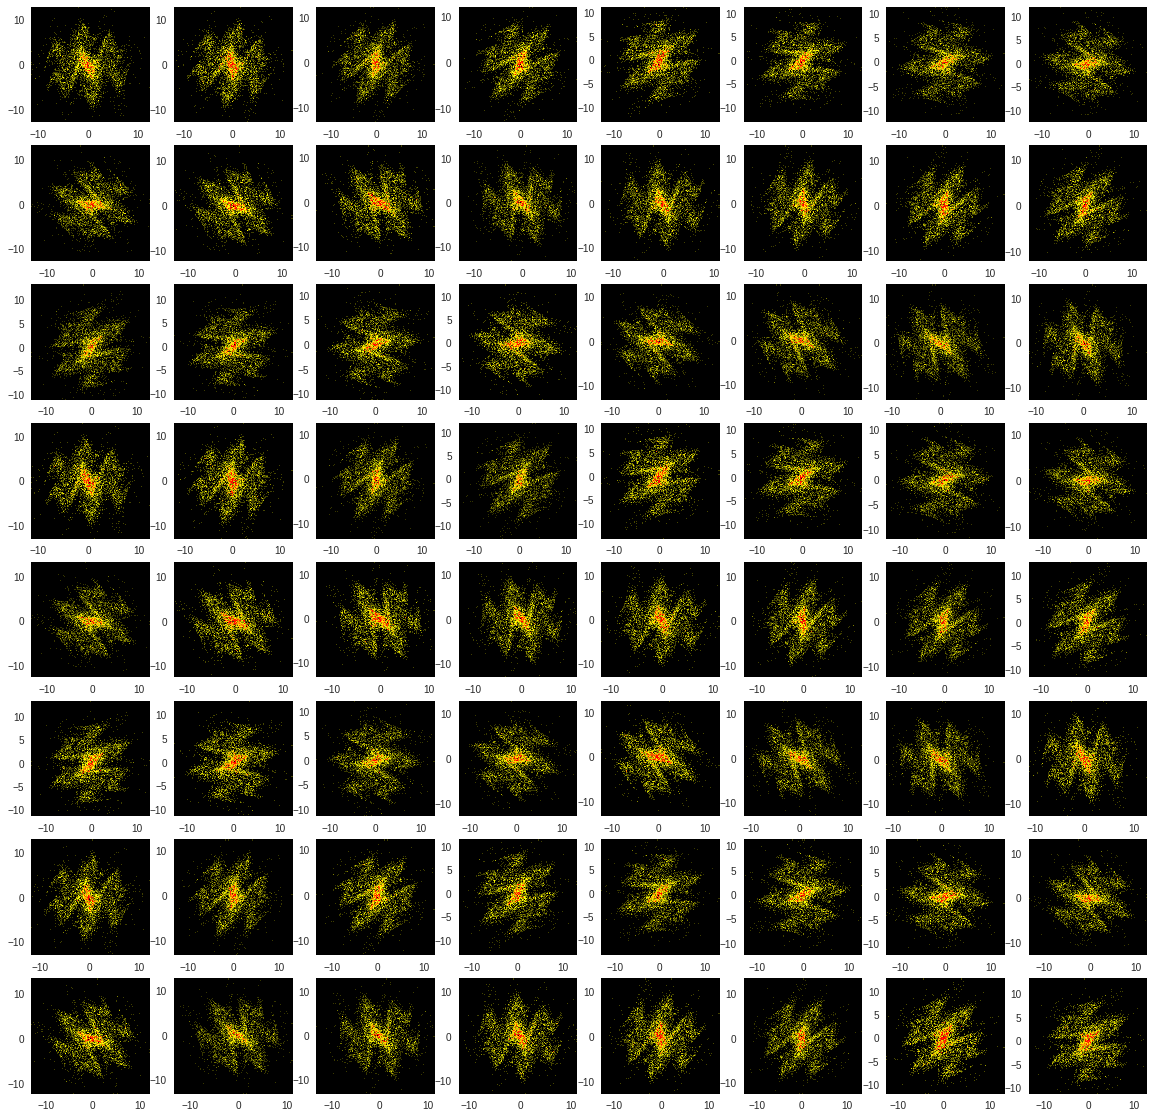

In [5]:
# Proceso adiabatico, se quitan las patadas y el acoplamiento al reservorio

# Dibujamos la funcion de distribucion en los primeros 64 puntos del proceso
fig, axs = plt.subplots(8, 8, figsize=(20, 20)) 

omegas2, energies2 = [], []
t_system.coef = 0
t_system.kappa = 0
t_system.q = 16
i = 0

# Se realiza el preceso hasta que el sistema vuelve a la energia inicial (del reservorio)
while t_system.actual_energy() > 5:
    if i < 64:
        axs.flat[i].hist2d(t_system._xp_state[:, 0], t_system._xp_state[:, 1], cmap=cmap, bins=120)
        i += 1
    
    t_system.omega -= 0.001
    t_system.make_n_kicks(1)
    omegas2.append(t_system.omega)
    energies2.append(t_system.last_mean_energy())

In [6]:
# Proceso isotermico (sin patadas). Volvemos a poner el acoplamiento con el reservorio

omegas3, energies3 = [], []
t_system.coef = 0.1
t_system.q = 4
while t_system.omega < 1.5:
    t_system.omega += 0.005
    t_system.make_n_kicks(1)
    omegas3.append(t_system.omega)
    energies3.append(t_system.last_mean_energy())

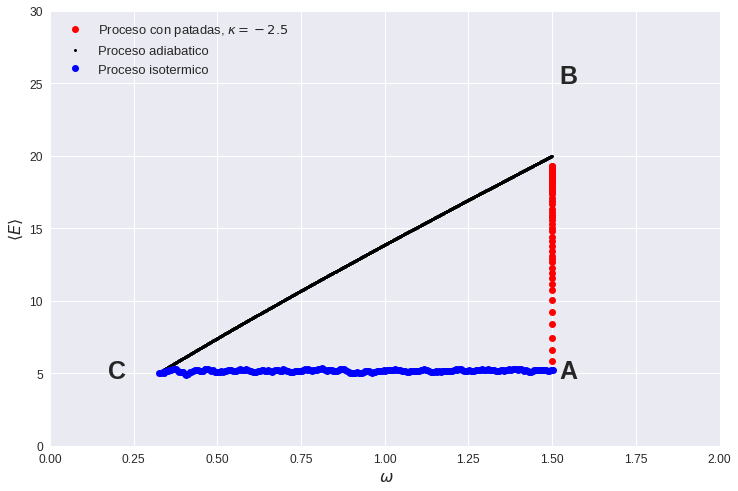

In [7]:
# Creamos la figura del ciclo termodinamico

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(omegas1, energies1, color='red', marker='o', 
        linestyle='', label='Proceso con patadas, $\kappa=-2.5$')
ax.plot(omegas2, energies2, color='black', marker='o', markersize=3,
        linestyle='', label='Proceso adiabatico')
ax.plot(omegas3, energies3, color='blue', marker='o', 
        linestyle='', label='Proceso isotermico')


ax.legend(fontsize=13, loc='upper left')
ax.axis([0, 2, 0, 30])

ax.text(1.55, 5.15, 'A', fontsize=25, fontweight='bold', 
        ha='center', va='center')
ax.text(1.55, 25.5, 'B', fontsize=25, fontweight='bold', 
        ha='center', va='center')
ax.text(0.2, 5.15, 'C', fontsize=25, fontweight='bold', 
        ha='center', va='center')

ax.tick_params(labelsize=12)
ax.set_xlabel(' $\\omega$', fontsize=16)
ax.set_ylabel('$\\langle E \\rangle$', fontsize=16)
plt.show()

## **Ciclo termodinamico 2 (siempre hay patadas)**

* A - B: Aumento de la fuerza de las patadas
* B - C: Disminucion de $\omega$ con patadas fuertes
* C - D: Disminucion de la fuerza de las patadas
* D - A: Aumento de $\omega$ con patadas peque;as

### Acoplamiento $\beta=0.1$

In [8]:
# Creamos el sistema y definimos sus parametros
t_system = DampedKHO(5000, kappa=-1.5, kbt_ext=5, omega=1.5, q=4)

# Proceso para llegar al quasi-equilibrio (A)
t_system.make_n_kicks(60)

In [9]:
# Aumentamos la fuerza de las patadas (A-B)

omegas1b, energies1b = [], []
t_system.kappa = -2.5

for kick in range(70):
    t_system.make_n_kicks(1)
    omegas1b.append(t_system.omega)
    energies1b.append(t_system.last_mean_energy())

In [10]:
# Disminuimos omega, manteniendo las patadas fuertes (B-C)

omegas2b, energies2b = [], []

while t_system.omega > 0.27:
    t_system.omega -= 0.005
    t_system.make_n_kicks(1)
    omegas2b.append(t_system.omega)
    energies2b.append(t_system.last_mean_energy())

In [11]:
# Disminuimos las patadas a kappa=-1.5 (C-D)
t_system.kappa = -1.5
omegas3b, energies3b = [], []
while len(omegas3b) < 70:
    t_system.make_n_kicks(1)
    omegas3b.append(t_system.omega)
    energies3b.append(t_system.last_mean_energy())

In [12]:
# Aumentamos omega con patadas mas debiles (D-A)
omegas4b, energies4b = [], []

t_system.coef = 0.1
while t_system.omega < 1.5:
    t_system.omega += 0.005
    t_system.make_n_kicks(1)
    omegas4b.append(t_system.omega)
    energies4b.append(t_system.last_mean_energy())

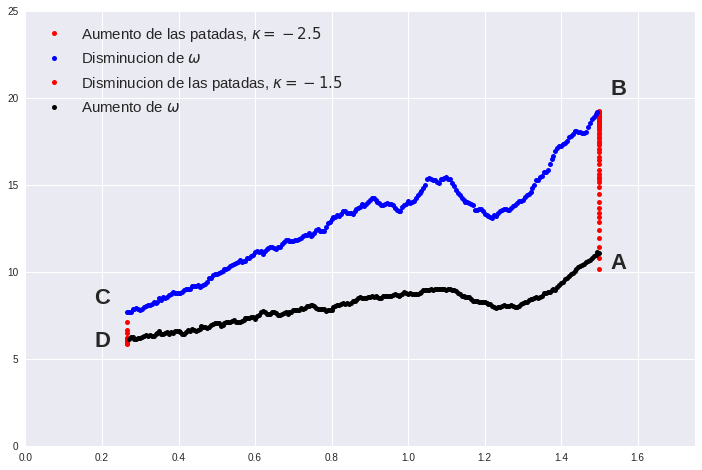

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(omegas1b, energies1b, marker='o', markersize=5, 
        color='red', label='Aumento de las patadas, $\kappa=-2.5$', linestyle='')
ax.plot(omegas2b, energies2b, marker='o', markersize=5, 
        color='blue', label='Disminucion de $\omega$', linestyle='')
ax.plot(omegas3b, energies3b, marker='o', markersize=5, 
        color='red', label='Disminucion de las patadas, $\kappa=-1.5$', linestyle='')
ax.plot(omegas4b, energies4b, marker='o', markersize=5,
        color='black', label='Aumento de $\omega$', linestyle='')

ax.axis([0, 1.75, 0, 25])
ax.legend(loc='upper left', fontsize=15)

ax.text(1.55, 10.5, 'A', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(1.55, 20.5, 'B', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(0.2, 8.5, 'C', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(0.2, 6, 'D', ha='center', va='center', fontsize=22,
        fontweight='bold')

plt.show()

### Acoplamiento $\beta=0.05$

In [14]:
# Creamos el sistema y definimos sus parametros
t_system = DampedKHO(5000, kappa=-1.5, kbt_ext=5, omega=1.5, q=4, 
                     gamma=0.05)

# Proceso para llegar al quasi-equilibrio (A)
t_system.make_n_kicks(60)

In [15]:
# Aumentamos la fuerza de las patadas (A-B)

omegas1c, energies1c = [], []
t_system.kappa = -2.5

for kick in range(70):
    t_system.make_n_kicks(1)
    omegas1c.append(t_system.omega)
    energies1c.append(t_system.last_mean_energy())

In [16]:
# Disminuimos omega, manteniendo las patadas fuertes (B-C)

omegas2c, energies2c = [], []

while t_system.omega > 0.27:
    t_system.omega -= 0.005
    t_system.make_n_kicks(1)
    omegas2c.append(t_system.omega)
    energies2c.append(t_system.last_mean_energy())

In [17]:
# Disminuimos las patadas a kappa=-1.5 (C-D)
t_system.kappa = -1.5
omegas3c, energies3c = [], []
while len(omegas3c) < 70:
    t_system.make_n_kicks(1)
    omegas3c.append(t_system.omega)
    energies3c.append(t_system.last_mean_energy())

In [18]:
# Aumentamos omega con patadas mas debiles (D-A)
omegas4c, energies4c = [], []

t_system.coef = 0.1
while t_system.omega < 1.5:
    t_system.omega += 0.005
    t_system.make_n_kicks(1)
    omegas4c.append(t_system.omega)
    energies4c.append(t_system.last_mean_energy())

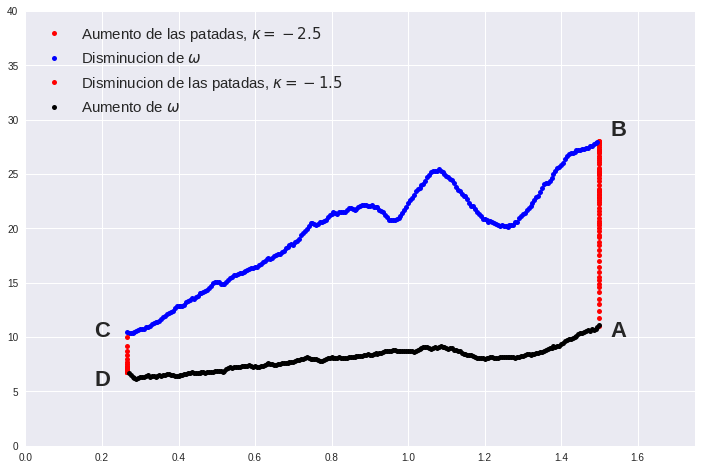

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(omegas1c, energies1c, marker='o', markersize=5, 
        color='red', label='Aumento de las patadas, $\kappa=-2.5$', linestyle='')
ax.plot(omegas2c, energies2c, marker='o', markersize=5, 
        color='blue', label='Disminucion de $\omega$', linestyle='')
ax.plot(omegas3c, energies3c, marker='o', markersize=5, 
        color='red', label='Disminucion de las patadas, $\kappa=-1.5$', linestyle='')
ax.plot(omegas4c, energies4c, marker='o', markersize=5,
        color='black', label='Aumento de $\omega$', linestyle='')

ax.axis([0, 1.75, 0, 40])
ax.legend(loc='upper left', fontsize=15)

ax.text(1.55, 10.5, 'A', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(1.55, 29, 'B', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(0.2, 10.5, 'C', ha='center', va='center', fontsize=22,
        fontweight='bold')
ax.text(0.2, 6, 'D', ha='center', va='center', fontsize=22,
        fontweight='bold')

plt.show()